<a href="https://colab.research.google.com/github/thaizaloiola/comunidades_e_espacos_culturais_SP/blob/main/espacos_culturais_e_comunidades_sp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Favelas e Espaços Culturais na Cidade de São Paulo
##Informação Georreferenciada




Nas palavras de Edmund Burke, “um povo que não conhece a sua história está condenado à
repetí-la”. Partindo da premissa que esta afirmativa é verídica, tem-se que elementos
culturais compostos por exposições de arte e cultura, por exemplo, permitem que um povo
tenha contato com sua própria história. Se há de fato algum elemento na cultura que de fato
empodere cidadãos a reconhecer sua história, isto poderia, portanto, ser de grande auxílio
para que pessoas em situação de vulnerabilidade pudessem vir a melhor compreender sua
própria cultura, sua história e portanto, até mesmo transformar esta realidade.
Um segundo ponto sobre a importância da proximidade de eventos e ambientes culturais
para pessoas que vivem em regiões mais marginalizadas consiste exatamente no fato de que
estes grupos são os que menos a consomem. O estudo “consumo de bens e serviços culturais
e alocação de tempo no Brasil” nos trás que o consumo cultural é uma atividade intensiva
em tempo de forma que está sujeita a restrição tanto via renda quanto via tempo disponível
para consumo. O estudo conclui que nível de escolaridade e participação no mercado de
trabalho são determinantes para o consumo cultural.
Portanto, o intuito deste projeto é fazer um estudo georreferenciado de forma a averiguar se
as localidades dos pontos culturais em São Paulo situam-se em posições geográficas que
favorecem a população mais carente, isto é, aquela que habita majoritariamente em regiões
de vulnerabilidade, popularmente conhecidas como favelas

#Instalando todas as bilbiotecas que serão necessárias para a análise

In [1]:
!pip install geopandas pygeos contextily --quiet

!pip install pointpats --quiet

In [2]:
import geopandas as gpd
import contextily
import matplotlib.pyplot as plt
import numpy as np

#Bibioteca para fazer o mapa de calor
import seaborn as sns

#Bibliotecas para fazer a análise do centro médio e o círculo/elipse de distância padrão
from pointpats.centrography import mean_center, weighted_mean_center, std_distance, ellipse
from pointpats import PointPattern
from pointpats.centrography import std_distance

#Biblioteca para fazer os quadrats
import pointpats.quadrat_statistics as qs

#Biliotecas para fazer a análise de K de Ripley:
from pointpats.distance_statistics import K
from pointpats import PoissonPointProcess
from pointpats.distance_statistics import Kenv


/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


##Geodataframe

Criou-se um geodataFrame da cidade de São Paulo e na sequência aos locais culturais que a cidade possui.

Na sequência, foi feito uma análise afim de verificar se há concentração desses espaços ou não, e caso haja, qual que é a distância desses espaços com os espaços de comunidades mais periféricas na cidade.


> O objeto desta análise consiste em verificar se a a parcela mais carente da população tem igual disponibilidade de recursos culturais para consumo como o restante da população de São Paulo.



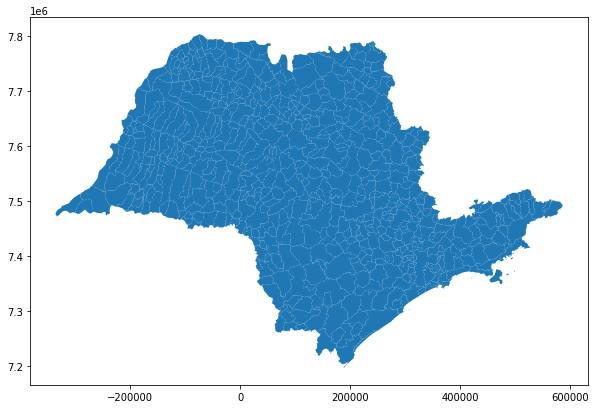

In [3]:
municipios = gpd.read_file('SIRGAS_limites_municipais.shp')
municipios = municipios.set_crs('EPSG:31983')
municipios.plot(figsize=(10,15))


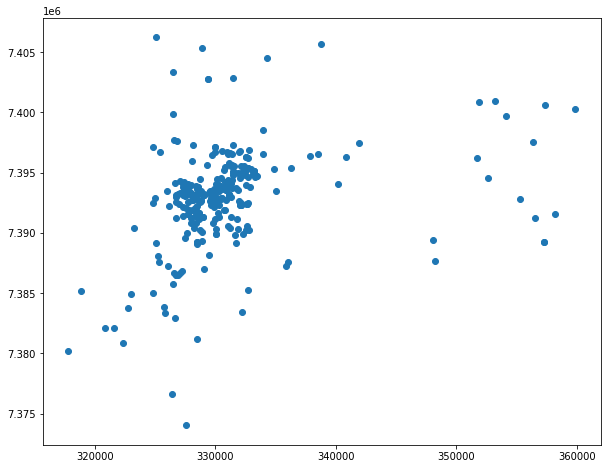

In [4]:
locaisCulturais = gpd.read_file('SIRGAS_SHP_TEMA_-_CULTURA_ESPACOS_CULTURAIS.shp')
locaisCulturais = locaisCulturais.set_crs('EPSG:31983')
locaisCulturais.plot(figsize=(10,15))

In [5]:
muni_sp = gpd.sjoin(municipios, locaisCulturais, op='contains')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


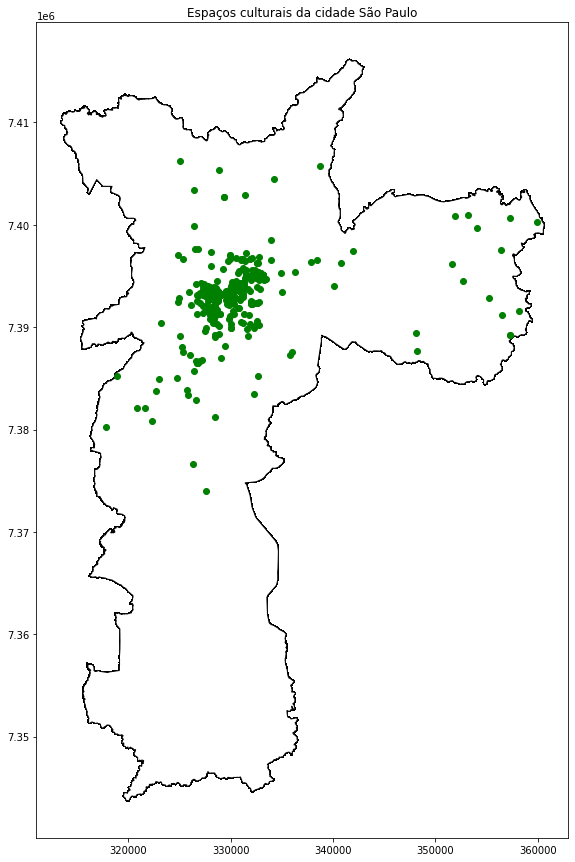

In [6]:
grafico = muni_sp.plot(figsize=(10,15), color ="white", edgecolor="black")
locaisCulturais.plot(ax=grafico, color="green")
grafico.set_title("Espaços culturais da cidade São Paulo");

##Os dados são clusterizados?

Afim de entender se os dados encontram-se clusterizados, bem como à qual nível, utilizou-se em primeira análise as ferramentas de Quadrats e Mapas de Kernel.

Assim sendo, fez-se uso de um ferramental mais estatístico que consiste primeiramente no Quadrats - que é um pouco mais rudimentar -,
bem como uma avaliação baseada na função K de Ripley com envelope.


In [7]:
x = locaisCulturais['geometry'].x
y = locaisCulturais['geometry'].y

In [8]:
#calculando o centro médio dos espaços culturais

pontos = np.vstack((x, y)).T

pp = PointPattern(pontos)

mc_locaisCulturais = mean_center(pp.points)

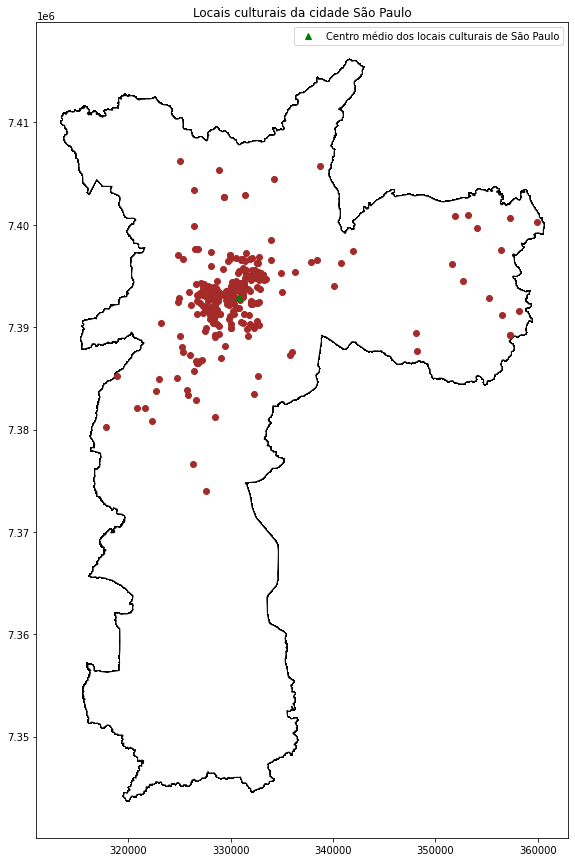

In [9]:
grafico = muni_sp.plot(figsize=(10,15), color ="white", edgecolor="black")
locaisCulturais.plot(ax=grafico, color="brown")
plt.plot(mc_locaisCulturais[0],mc_locaisCulturais[1], 'g^', label='Centro médio dos locais culturais de São Paulo')
grafico.legend()
grafico.set_title("Locais culturais da cidade São Paulo");

######Fazendo o círculo da distância padrão:

[]

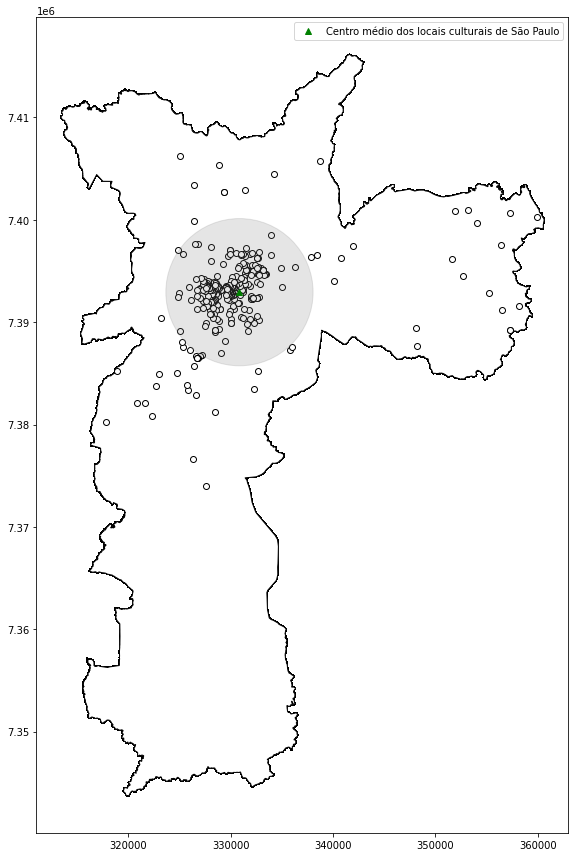

In [10]:
stdd = std_distance(pp.points)

fig, ax = plt.subplots(figsize=(10,15))
muni_sp.plot(ax = ax, color='white', edgecolor='k')
locaisCulturais.plot(ax=ax, color='white', edgecolor='k')
plt.plot(mc_locaisCulturais[0], mc_locaisCulturais[1], 'g^', label='Centro médio dos locais culturais de São Paulo')
circle1=plt.Circle((mc_locaisCulturais[0], mc_locaisCulturais[1]),stdd,color='gray', alpha = 0.2)
ax.add_artist(circle1)
plt.legend()
plt.plot()



###Análise Estatística Inferencial

Objetiva-se com esta análise entender o comportamento inferencial estatístico dos dados para que, em última análise, entenda-se a clusterização dos dados apresentados.

In [11]:
q_r = qs.QStatistic(pp, shape='rectangle', nx=3, ny=3)

q_r.chi2 


906.336448598131

Em análise estatística a partir do teste Chi2, encontra-se como evidência um elevado valor de Chi2, apontando a possibilidade de que estes dados estejam clusterizados.




In [12]:
q_r.chi2_pvalue 

#ademais, verfica-se que quando temos um p-valor baixo, isso é
#um indicarivo de que ele é clusterizado, pois um p-valor baixo nos indica que
#significância estatística para clusterização


2.426867833407524e-190

Ainda, analisando via p-valor, entende-se que à 95% de confiança existem evidências de que os dados são clusterizados (p-valor < nível de significância do teste).

###Análise de Quadrat

Ainda objetivando entender o comportamento da clusterização dos dados, estuda-se agora os dados a partir de quadrats.

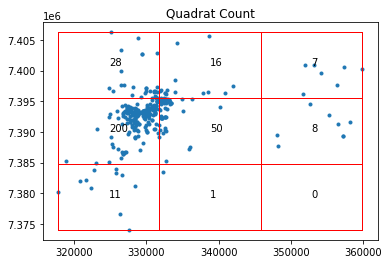

In [13]:
q_r.plot()

Como resultado preliminar, encontra-se novamente evidências favoráveis à clusterização dos dados.

A alta concentração de dados em um dos quadrantes traz à tona, novamente evidências de que os dados estejam clusterizados.

###Mapa de Kernel

Para além das análises anteriormente realizadas, ambas com objetivo de identificar a clusterização dos dados, realizou-se a partir de um ferramental visual o Mapa de Kernel dos dados.

O Mapa de Kernel nos fornece um *mapa de calor*, o qual ajudará a identificar se há regiões *mais quentes* - leia-se com maior concentração de pontos - e regiões *mais frias* - ou seja, aquelas com menor concentração de pontos.

Espera-se encontrar resultados coerentes com as análises anteriores e assim sendo, no caso de haver grande *concentração de calor* em uma única região, mais evidência apontará para a possibilidade de haver clusterização.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

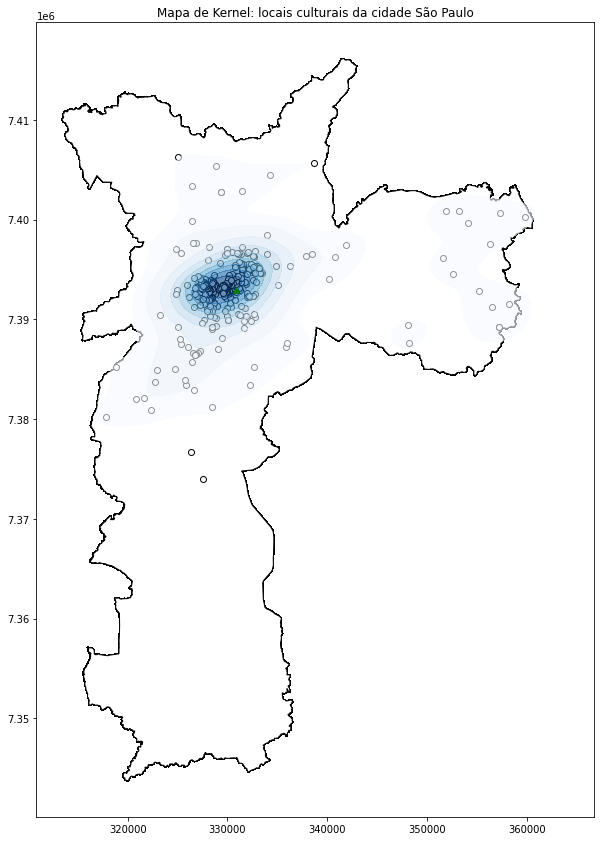

In [14]:
fig, ax = plt.subplots(figsize=(10,15))
muni_sp.plot(ax = ax, color='white', edgecolor='k').set_title("Mapa de Kernel: locais culturais da cidade São Paulo");
locaisCulturais.plot(ax=ax, color='white', edgecolor='k')
plt.plot(mc_locaisCulturais[0], mc_locaisCulturais[1], 'g^', label='Centro médio dos locais culturais de São Paulo')
sns.kdeplot(pontos[:,0], pontos[:,1], shade=True, cmap='Blues', ax=ax, alpha=0.6)
#plt.legend()
plt.plot()

###Função K de Ripley

Ainda objetivando entender o comportamento de clusterização geoespacial dos dados de Locais Culturais, além das análises anteriormente realizadas - as quais apontam fortemente para a clusterização dos dados -, foi feito o uso da Função K de Ripley.

Por sua vez, agora verifica-se de um ponto de vista estritamente estatístico a hipótese que ampara a clusterização dos dados em questão.

> A função K de Ripley consiste em um método baseado em contagem e distância, que utiliza as coordenadas (x, y) de cada evento ocorrido na área de estudo, e avalia a distribuição espacial em diferentes escalas simultaneamente, trazendo maior flexibilidade  em  relação  a  outros  métodos *(RIPLEY, 1977; CAPRETZ, 2004; RODE et al., 2010; MACHADO et al., 2012)*.

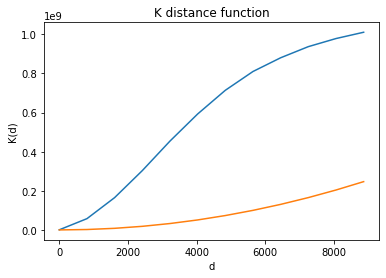

In [15]:
kp = K(pp)

kp.plot()


No gráfico K distance function (acima), temos que a curva laranja é o processo aleatório (Processo Estocástico de Poisson), e a curva azul apontando que para cada distância elencada no Eixo x, os pontos estão encontrando vários vizinhos - no caso, encontrando mais vizinhos do que um processo estocástico em Poisson deveria encontrar, pois está bem acima da curva laranja.

Ainda, no mesmo gráfico, observa-se que são encontrandos mais vizinhos a medida que aumenta o raio de distancia do que quando comparado ao proceso aleatório, trazendo nova evidência, coerente com as anteriormente encontradas, em favor da clusterização geoespacial dos dados de Centros Culturais.

##### Gerando 250 amostragens para o processo estocástico de poisson abaixo


In [16]:
realizations = PoissonPointProcess(pp.window, pp.n, 250, asPP = True) 

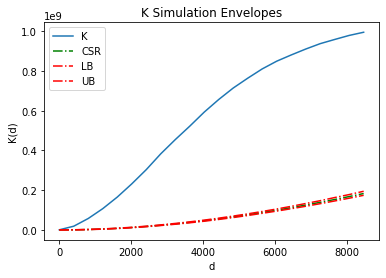

In [17]:
kenv = Kenv(pp, intervals=20, realizations=realizations)
kenv.plot()

Do gráfico K Simulation Envelopes (acima), conforme é possível ver, a hipótese de que há clusterização pode ser validada, pois nossos dados permaneceram muito fora do intervalor de confiança apresentado.

**Desta forma, há evidência estatística suficiente para afirmar que a distribuição de Centros Culturais não se aproxima do processo estocástico gerador e que, não restam dúvidas, tratam-se de dados clusterizados.**



---



##Favelas em São Paulo

Em continuidade de nossas análises, estudou-se a localização das comunidades (favelas) em São Paulo.

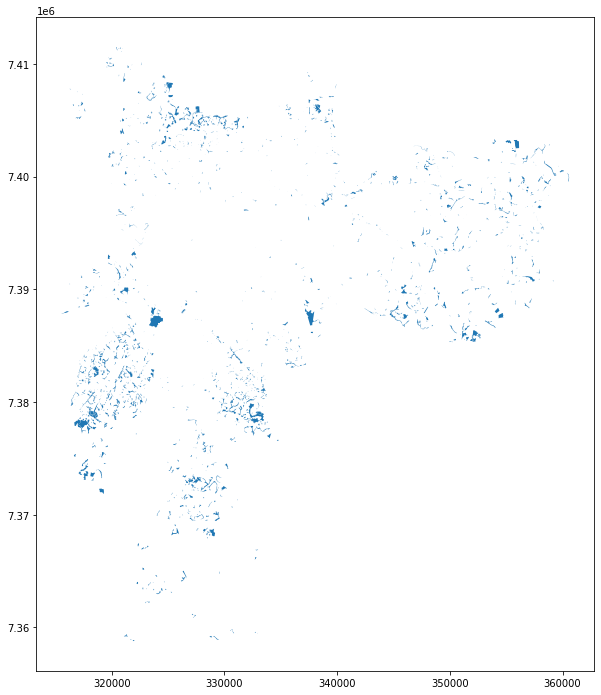

In [18]:
comunidades = gpd.read_file('SIRGAS_SHP_favela.shp')
comunidades = comunidades.set_crs('EPSG:31983')
comunidades.plot(figsize=(10,15))

Uma vez que as comunidades estão em formato de Geometry, utilizou-se o método que possui como *output* o centróide das comunidades.

Os pontos em cada uma das colunas do geodataframe original serão armazenados para uso futuro.

In [19]:
comunidades['points'] = comunidades.centroid

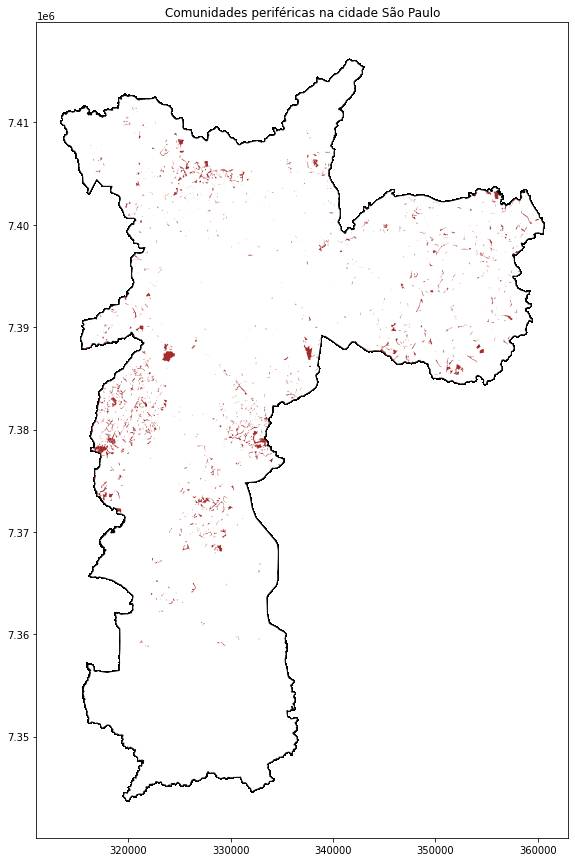

In [20]:
grafico = muni_sp.plot(figsize=(10,15), color ="white", edgecolor="black")
comunidades.plot(ax=grafico, color="brown")
grafico.set_title("Comunidades periféricas na cidade São Paulo");

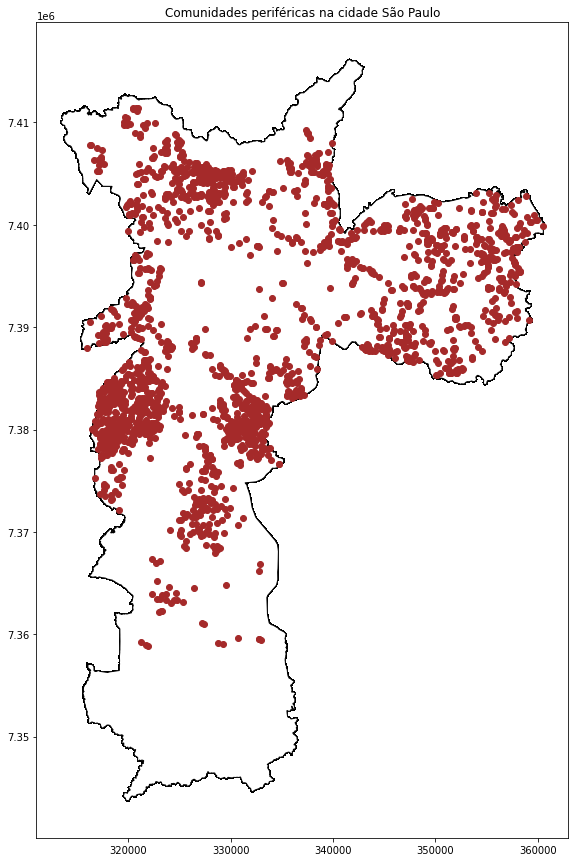

In [21]:
grafico = muni_sp.plot(figsize=(10,15), color ="white", edgecolor="black")
comunidades['points'].plot(ax=grafico, color="brown")
grafico.set_title("Comunidades periféricas na cidade São Paulo");

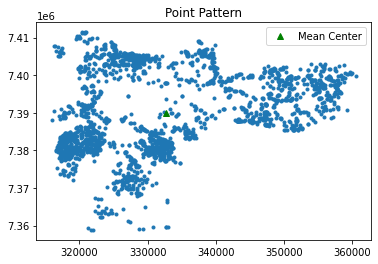

In [22]:
x= comunidades['points'].x
y= comunidades['points'].y

pontos = np.vstack((x, y)).T

pp = PointPattern(pontos)

mc_comunidades = mean_center(pp.points)

pp.plot()
plt.plot(mc_comunidades[0],mc_comunidades[1], 'g^', label='Mean Center')
plt.legend();

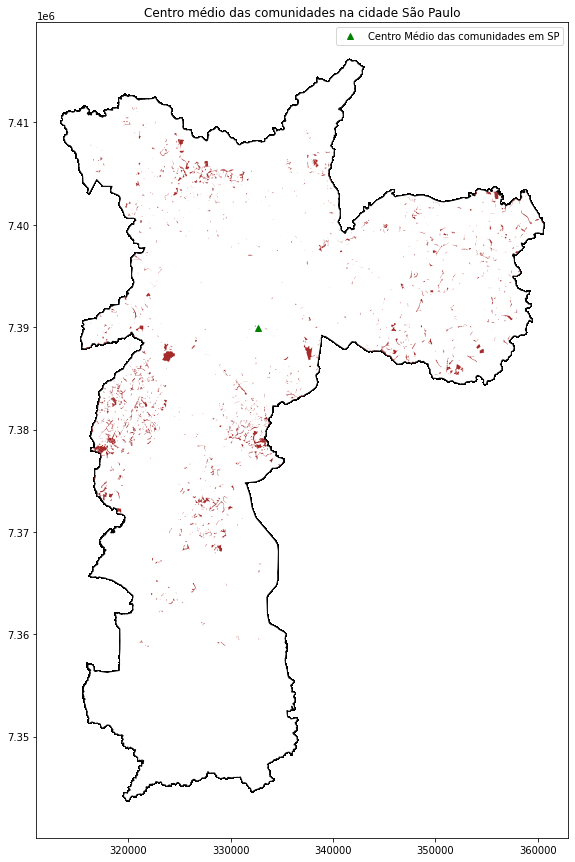

In [23]:
grafico = muni_sp.plot(figsize=(10,15), color ="white", edgecolor="black")
comunidades.plot(ax=grafico, color="brown")
plt.plot(mc_comunidades[0],mc_comunidades[1], 'g^', label='Centro Médio das comunidades em SP')
grafico.legend()
grafico.set_title("Centro médio das comunidades na cidade São Paulo");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

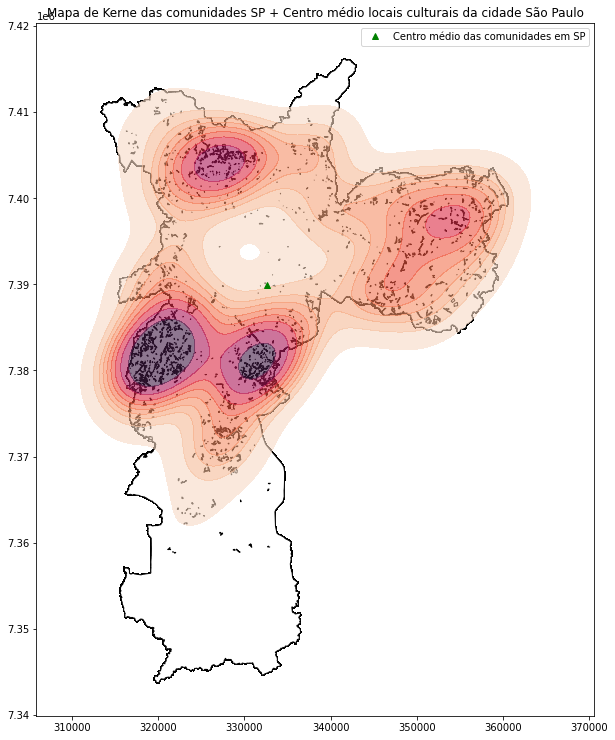

In [24]:
fig, ax = plt.subplots(figsize=(10,15))
muni_sp.plot(ax = ax, color='white', edgecolor='k').set_title("Mapa de Kerne das comunidades SP + Centro médio locais culturais da cidade São Paulo");
comunidades.plot(ax=ax, color='white', edgecolor='k')
plt.plot(mc_comunidades[0], mc_comunidades[1], 'g^', label='Centro médio das comunidades em SP')
sns.kdeplot(pontos[:,0], pontos[:,1], shade=True, cmap='rocket_r', ax=ax, alpha=0.6)
plt.legend()
plt.plot()

Ao que parece, as comunidades de São Paulo (cidade) são bastante condensadas em regiões específicas. Sendo assim, a informação de centro médio não transmite plena riqueza de informações, pois o ponto médio não está situado onde ocorrem os clusters das comunidades, mas fica num local central entre eles.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

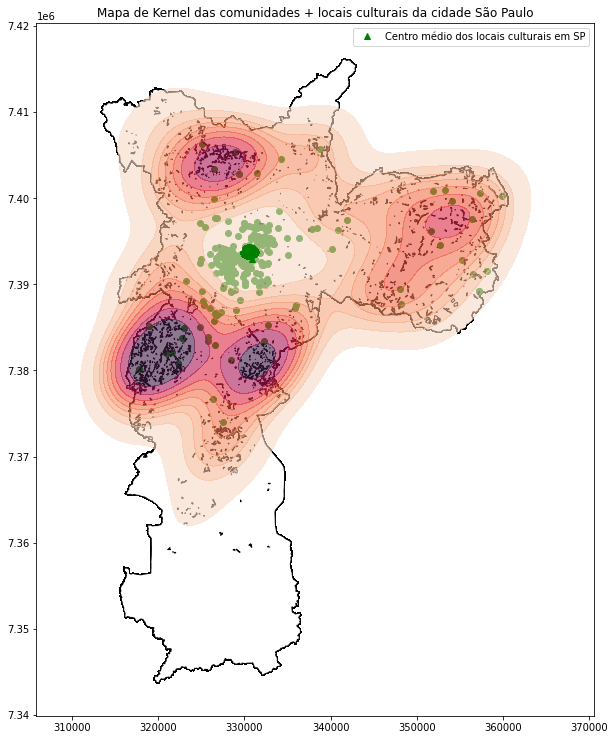

In [25]:
fig, ax = plt.subplots(figsize=(10,15))
muni_sp.plot(ax = ax, color='white', edgecolor='k').set_title("Mapa de Kernel das comunidades + locais culturais da cidade São Paulo");
locaisCulturais.plot(ax=ax, color='green')
comunidades.plot(ax=ax, color='white', edgecolor='k')
plt.plot(mc_locaisCulturais[0], mc_locaisCulturais[1], 'g^', label='Centro médio dos locais culturais em SP')
sns.kdeplot(pontos[:,0], pontos[:,1], shade=True, cmap='rocket_r', ax=ax, alpha=0.6)
plt.legend()
plt.plot()

#Conclusões do Projeto I

## Centros Culturais estão clusterizados, com alta concentração na Região Central e Zona Oeste da Cidade de São Paulo

> "Hoje, os principais centros e museus de ciência estão localizados nas grandes capitais, o que é resultado da nossa própria história. Mesmo vivendo um processo de interiorização das universidades, ainda não temos a mesma proporção com a criação desses espaços. O interior carece de espaços científicos e culturais" (afirma Carlos Wagner, presidente da Associação Brasileira de Centros e Museus de Ciências (ABCMC), *apud* BARATA, 2015).

Ainda, segundo o estudo *Espaços científicos e culturais ainda concentrados nas capitais e voltados para o público escolar* (BARATA, 2015), a afirmação de Carlos Wagner é coerente com os resultados da pesquisa "Percepção Pública da Ciência e Tecnologia no Brasil" (MCTI, 2010), a qual aponta que entre as razões para não visitar ou participar de eventos científicos, 36,8% dos entrevistados disseram que não existem iniciativas do tipo em suas regiões.

## Projetos Sociais em periferias surgem para suprir desigualdade de acesso

Roque Laraia (antropólogo brasileiro), define cultura como: o modo de ver o mundo, as apreciações de ordem moral e valorativa, os diferentes comportamentos sociais e mesmo as posturas corporais são assim produtos de uma herança cultural. (COELHO, 2018).

Apesar da promulgação, em 1991, da Lei Rouanet, poucos são os projetos culturais que recebem auxílio suficiente para as suas manutenções em longo prazo no Brasil. Dentre os projetos citados pela colunista Layne Coelho, da página Voz das Comunidades, destacam-se:

###Projeto FAVELAGRAFIA

O Favelagrafia é um projeto idealizado pelo diretor de arte, André Havt, e pela designer Karina Abicalil e tem como objetivo mostrar ao mundo uma visão real de nove favelas do Rio através do olhar de fotógrafos que moram nas comunidades.

###Projeto BALLET MANGUINHOS

Criado em 2012 por Daiana Ferreira, nascida e criada em Manguinhos, o projeto tem como objetivo dar aulas de ballet para crianças e jovens, além de oferecer passeios à teatros, museus, eventos culturais e excursões. Hoje, 213 crianças têm suas vidas modificadas através da arte.

## Conclusões Parciais do Projeto - Parte I

O acesso aos Centros Culturais na Cidade de São Paulo nem sempre é democrático, e conversa diretamente com os resultados encontrados na pesquisa. 

Enquanto as Comunidades Periféricas se distribuem às margens da cidade, distanciando-se geoespacialmente das regiões centrais - as quais acomodam alguns dos principais centros econômicos e financeiros da América Latina -, os Centros Culturais seguem a lógica de formação das cidades e se concentram nas Regiões Centrais e Zona Oeste.

Para além dos esforços do Governo para suprir a ausência desses espaços, as comunidades se movimentam para fomentar projetos culturais que tragam para além dos instrumentos culturais de formação, também a noção de como ver o mundo, as diferentes condições sociais, econômicas e políticas tal qual estas se apresentam, bem como as perspectivas de democratização ao acesso à Cultura no país.

#Referências
Machado, Ana Flávia et al. Consumption of cultural goods and services and time allocation in Brazil. Nova Economia [online]. 2017, v. 27, n. 01 [Accessed 17 October 2021] , pp. 35-63. Available from: <https://doi.org/10.1590/0103-6351/3115>. ISSN 1980-5381. https://doi.org/10.1590/0103-6351/3115.

BARATA, Germana. Espaços científicos e culturais ainda concentrados nas capitais e voltados para o público escolar. Cienc. Cult. [online]. 2015, vol.67, n.3 [cited  2021-10-17], pp.8-12. Disponível em: <http://cienciaecultura.bvs.br/scielo.php?script=sci_arttext&pid=S0009-67252015000300004&lng=en&nrm=iso>. Acesso em 16 de out. 2021.

VEIGA, Edison. Espaços Culturais de São Paulo estão concentrados no Centro e na Zona Oeste. Estado de São Paulo, 2015. Disponível em: <https://sao-paulo.estadao.com.br/blogs/edison-veiga/espacos-culturais-de-sp-estao-concentrados-no-centro-e-na-zona-oeste/>. Acesso em 17 de out. 2021.

COELHO, Layne Moises. A cultural da favela como ferramenta de transformação social. Voz das Comunidades, 2018. Disponível em: <https://www.vozdascomunidades.com.br/geral/31826/>. Acesso em 17 de out. 2021.